In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read your data

raw_df = pd.read_csv('drive/My Drive/Colab Notebooks/Banking Marketing Precision.csv')
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no


In [2]:
raw_df = pd.read_csv('Banking Marketing Precision.csv')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45663 entries, 0 to 45662
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45663 non-null  int64  
 1   job        45663 non-null  object 
 2   marital    45663 non-null  object 
 3   education  45663 non-null  object 
 4   default    45663 non-null  object 
 5   balance    45663 non-null  int64  
 6   housing    45663 non-null  object 
 7   loan       45663 non-null  object 
 8   contact    45663 non-null  object 
 9   day        45663 non-null  int64  
 10  month      45663 non-null  object 
 11  duration   45317 non-null  float64
 12  campaign   45281 non-null  float64
 13  pdays      45446 non-null  float64
 14  previous   45395 non-null  float64
 15  poutcome   45663 non-null  object 
 16  y          45355 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 5.9+ MB


In [4]:
raw_df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration     346
campaign     382
pdays        217
previous     268
poutcome       0
y            308
dtype: int64

In [ ]:
cats = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y" ]
nums = ["age", "balance", "day", "campaign", "pdays", "previous"]
timestamp = ["duration"]

In [ ]:
raw_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45658,40,housemaid,married,primary,no,979,no,no,cellular,15,oct,106.0,4.0,-1.0,0.0,unknown,no
45659,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81.0,4.0,-1.0,0.0,unknown,no
45660,28,management,single,tertiary,no,866,no,no,cellular,23,mar,191.0,2.0,-1.0,0.0,unknown,yes
45661,31,technician,married,secondary,no,318,no,no,cellular,2,dec,310.0,1.0,-1.0,0.0,unknown,yes


In [ ]:
raw_df[nums].describe()

,age,balance,day,campaign,pdays,previous
count,45663.000000,45663.000000,45663.000000,45281.000000,45446.000000,45395.000000
mean,40.937389,1363.058012,15.811248,2.764250,40.166857,0.579667
std,10.616812,3049.909173,8.319972,3.097611,100.063270,2.303390
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.500000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [ ]:
raw_df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45663,45663,45663,45663,45663,45663,45663,45663,45663,45355
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9816,27473,23418,44839,25380,38350,29574,13910,37344,40055


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(raw_df[col].value_counts())
    print()

Value count kolom job:
blue-collar      9816
management       9566
technician       7684
admin.           5219
services         4187
retired          2293
self-employed    1589
entrepreneur     1503
unemployed       1312
housemaid        1254
student           946
unknown           294
Name: job, dtype: int64

Value count kolom marital:
married     27473
single      12928
divorced     5262
Name: marital, dtype: int64

Value count kolom education:
secondary    23418
tertiary     13449
primary       6914
unknown       1882
Name: education, dtype: int64

Value count kolom default:
no     44839
yes      824
Name: default, dtype: int64

Value count kolom housing:
yes    25380
no     20283
Name: housing, dtype: int64

Value count kolom loan:
no     38350
yes     7313
Name: loan, dtype: int64

Value count kolom contact:
cellular     29574
unknown      13151
telephone     2938
Name: contact, dtype: int64

Value count kolom month:
may    13910
jul     6973
aug     6311
jun     5379
nov     4006

In [ ]:
# melihat ringkasan data
list_feature = []
for col in raw_df:
    list_feature.append([col,
                      raw_df[col].dtype,
                      raw_df[col].isna().sum(),
                      raw_df[col].nunique(),
                      raw_df[col].unique()[:5]])

raw_df_info = pd.DataFrame(data=list_feature, columns='colums, datatype, null_values, unique_values, unique_sample'.split(","))
raw_df_info

# Exploratory Data Analysis

## Univariate Analysis

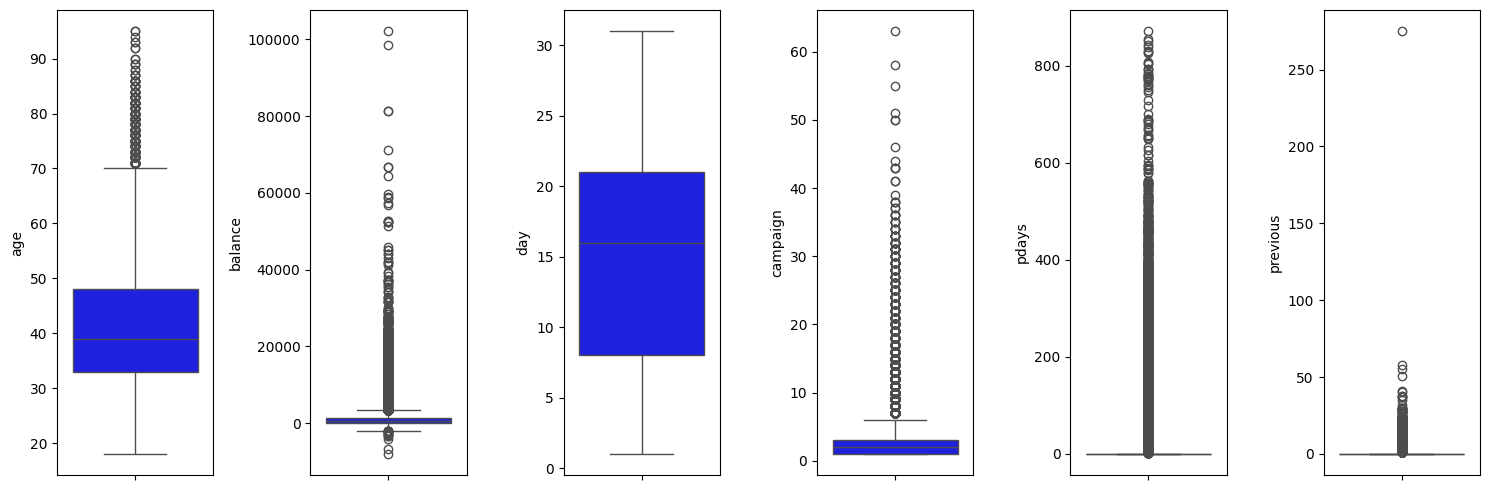

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=raw_df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

### outlier analysis

<Axes: ylabel='balance'>

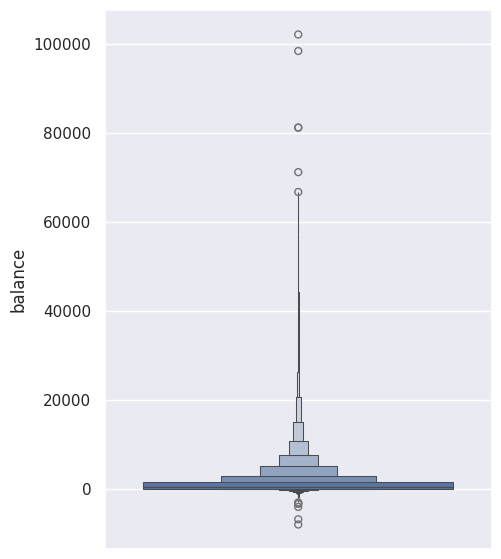

In [ ]:
sns.set(rc={'figure.figsize':(5,7)})
sns.boxenplot(y=raw_df['balance'])

<Axes: ylabel='pdays'>

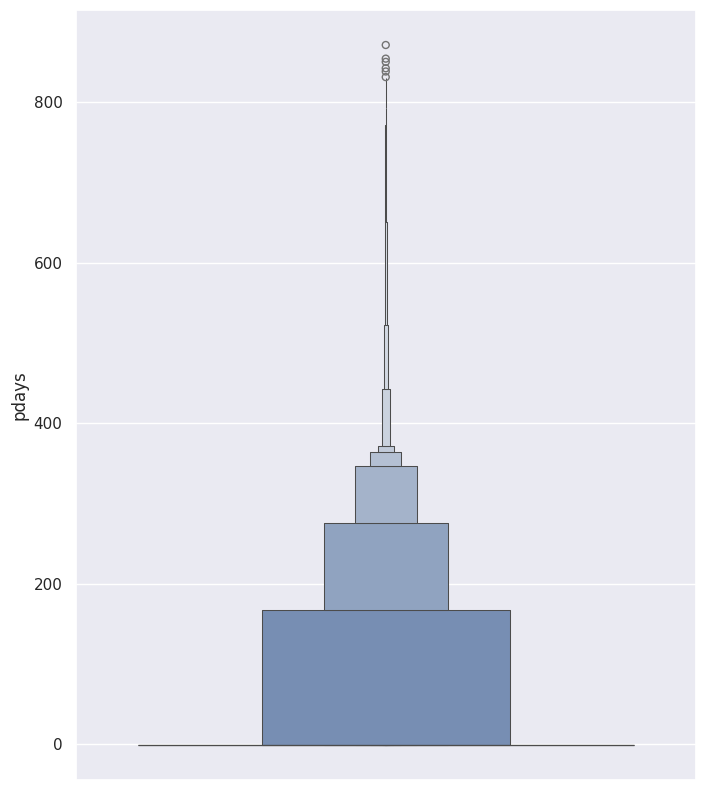

In [ ]:
sns.set(rc={'figure.figsize':(8,10)})
sns.boxenplot(y=raw_df['pdays'])

<Axes: xlabel='age', ylabel='Count'>

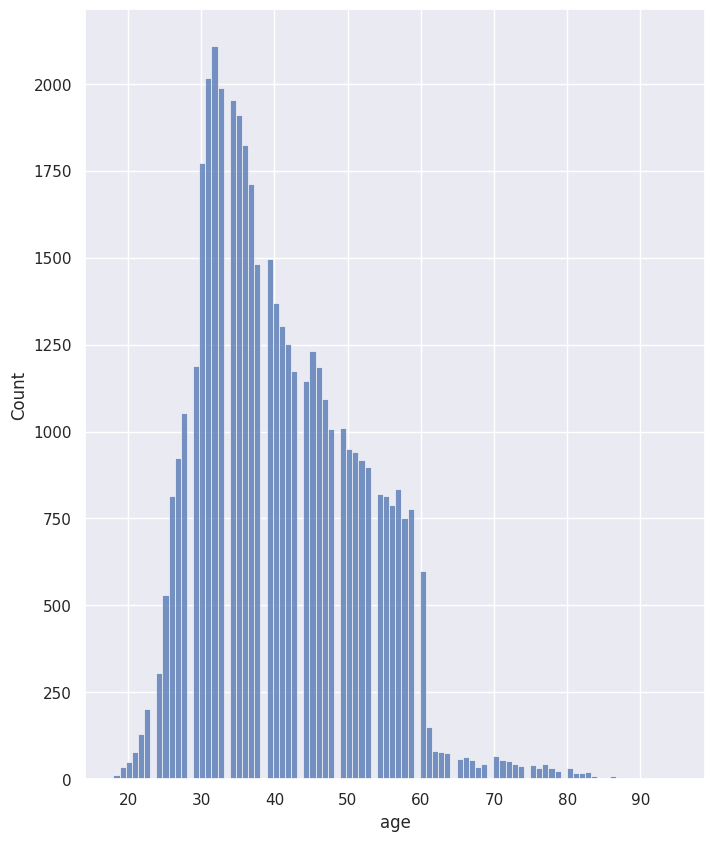

In [ ]:
sns.histplot(data=raw_df, x = 'age')

<Axes: xlabel='day', ylabel='Count'>

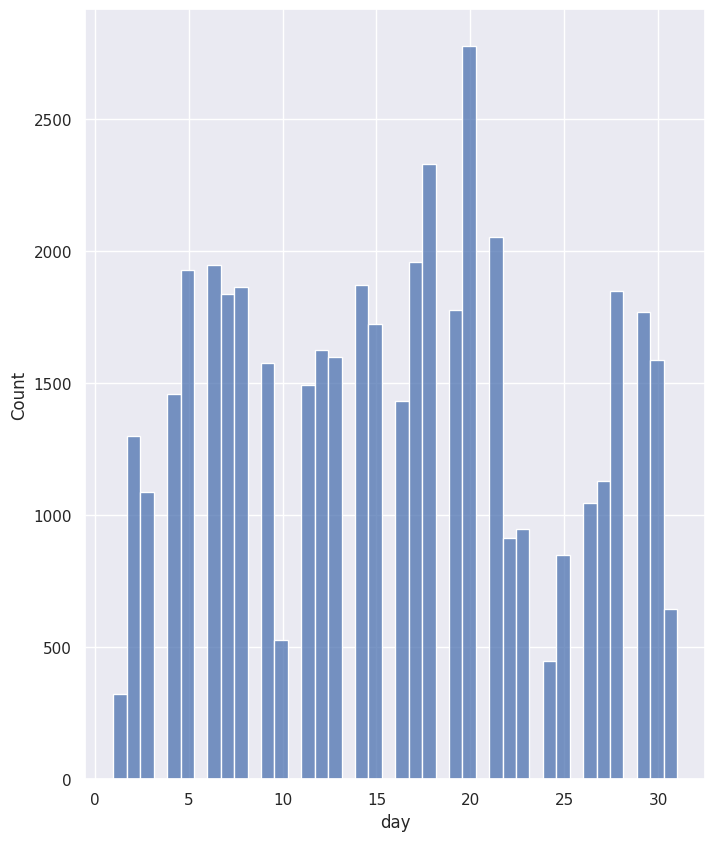

In [ ]:
sns.histplot(data=raw_df, x = 'day')

<Axes: xlabel='campaign', ylabel='count'>

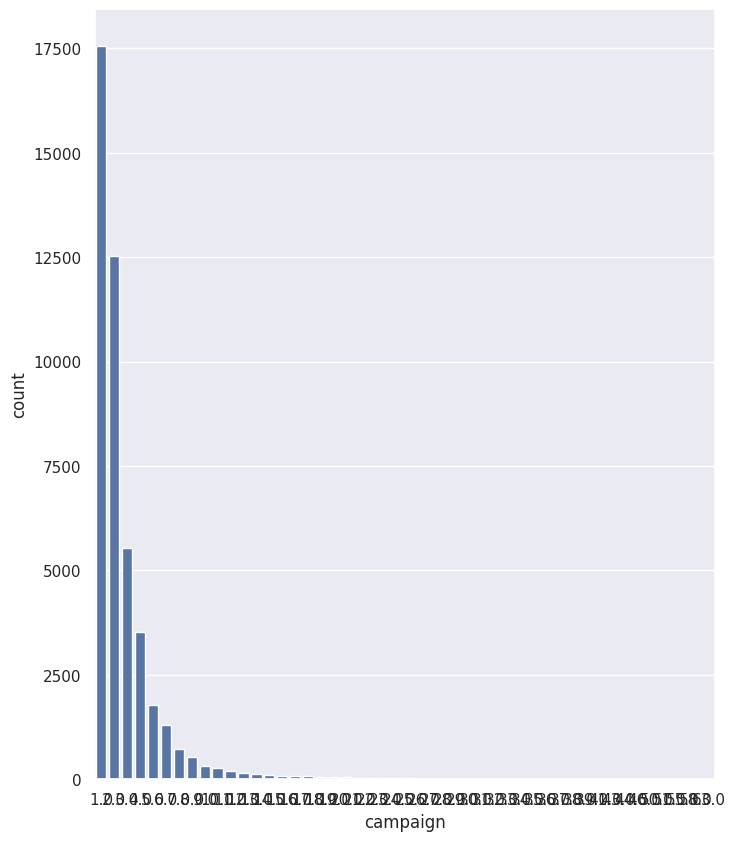

In [ ]:
sns.countplot(data=raw_df, x = 'campaign')

In [ ]:
education_counts = raw_df['education'].value_counts()
education_counts

secondary    23418
tertiary     13449
primary       6914
unknown       1882
Name: education, dtype: int64

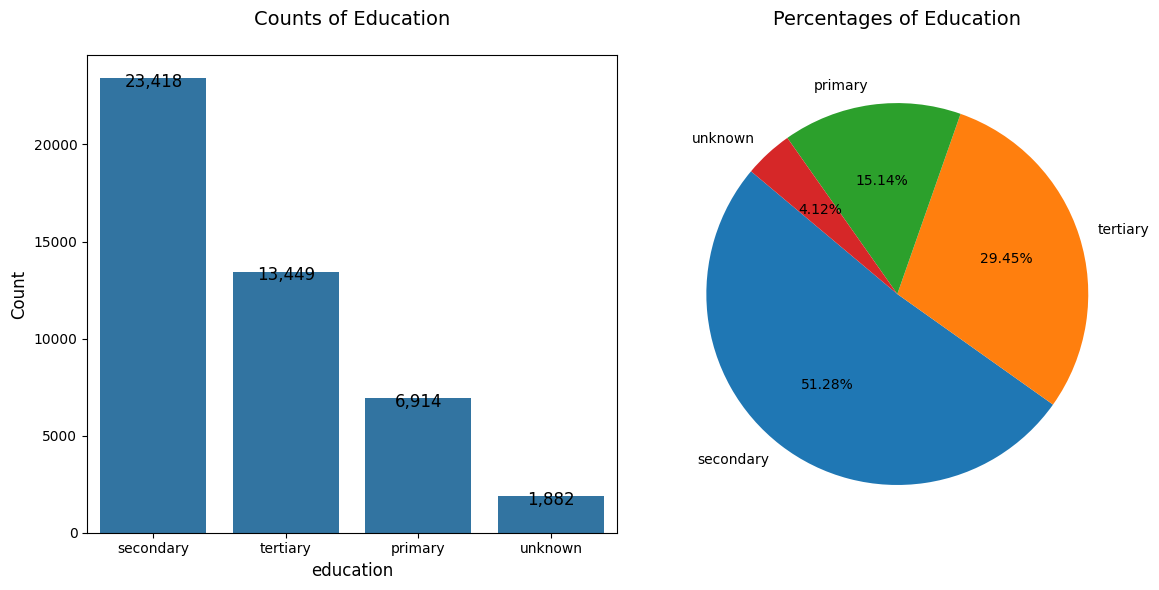

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=education_counts.index, y=education_counts)
for i, v in enumerate(education_counts):
    bar_height = ax.patches[i].get_height()
    text_pos = bar_height - 180
    ax.text(i, text_pos, f'{v:,}', ha='center', va='center', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('education', fontsize=12)
plt.title('Counts of Education\n', fontsize=14)

percentages = education_counts / education_counts.sum() * 100

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', startangle=140)
plt.title('Percentages of Education\n', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
y_counts = raw_df['y'].value_counts()
y_counts

no     40055
yes     5300
Name: y, dtype: int64

<ipython-input-18-2f414d7ab110>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=y_counts.index, y=y_counts, palette=['#ADBC9F' , '#FF6868'])


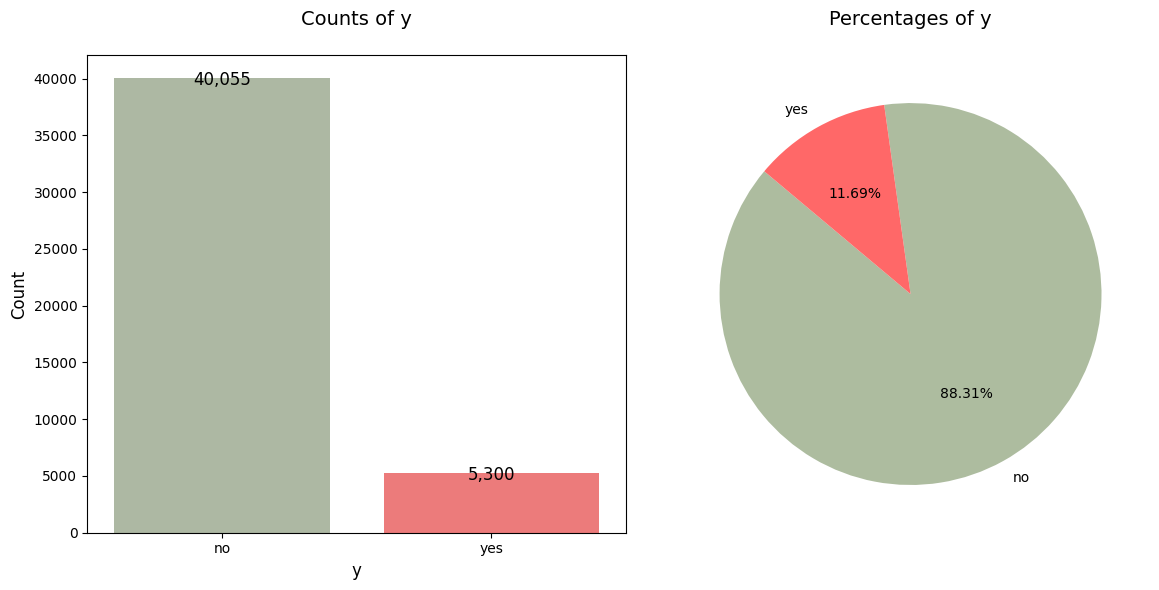

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=y_counts.index, y=y_counts, palette=['#ADBC9F' , '#FF6868'])
for i, v in enumerate(y_counts):
    bar_height = ax.patches[i].get_height()
    text_pos = bar_height - 180
    ax.text(i, text_pos, f'{v:,}', ha='center', va='center', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlabel('y', fontsize=12)
plt.title('Counts of y\n', fontsize=14)

percentages = y_counts / y_counts.sum() * 100

plt.subplot(1, 2, 2)
plt.pie(percentages, labels=percentages.index, autopct='%1.2f%%', colors=['#ADBC9F' , '#FF6868'], startangle=140)
plt.title('Percentages of y\n', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
#for i in range(0, len(cats[2:])):
    #plt.subplot(1, 10, i+1)
    #sns.countplot(raw_df[cats[2:][i]], color='blue', orient='h')
    #plt.tight_layout()

# Multivariate Analysis

In [ ]:
raw_df.corr()

<ipython-input-19-d78189c2f58f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_df.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.096627,-0.008973,-0.004636,0.004529,-0.023160,0.002382
balance,0.096627,1.000000,0.005281,0.021197,-0.013760,0.002935,0.016687
day,-0.008973,0.005281,1.000000,-0.030334,0.162630,-0.092822,-0.051879
duration,-0.004636,0.021197,-0.030334,1.000000,-0.084078,-0.001776,0.001197
campaign,0.004529,-0.013760,0.162630,-0.084078,1.000000,-0.089196,-0.033075
pdays,-0.023160,0.002935,-0.092822,-0.001776,-0.089196,1.000000,0.454971
previous,0.002382,0.016687,-0.051879,0.001197,-0.033075,0.454971,1.000000


<ipython-input-20-b101fa6aa056>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')


<Axes: >

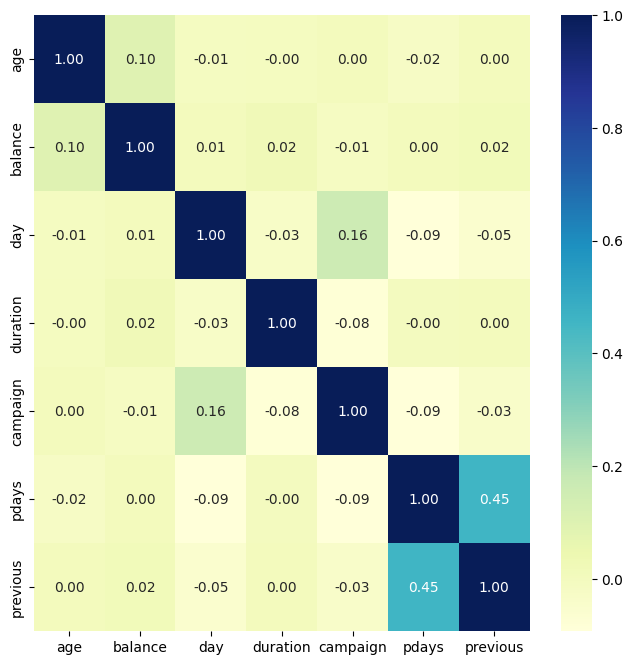

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(raw_df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')

<ipython-input-21-3e98d8596b25>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(method='spearman'), cmap="YlGnBu", annot=True)


<Axes: >

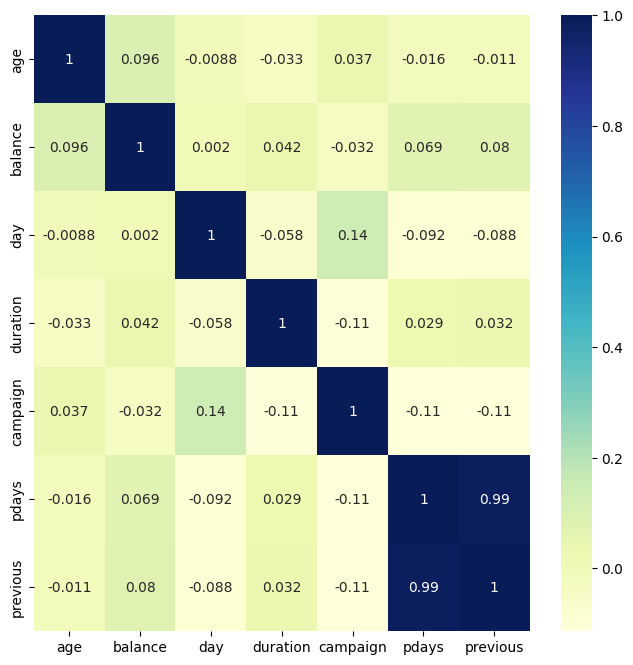

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(raw_df.corr(method='spearman'), cmap="YlGnBu", annot=True)

<Figure size 1000x800 with 0 Axes>

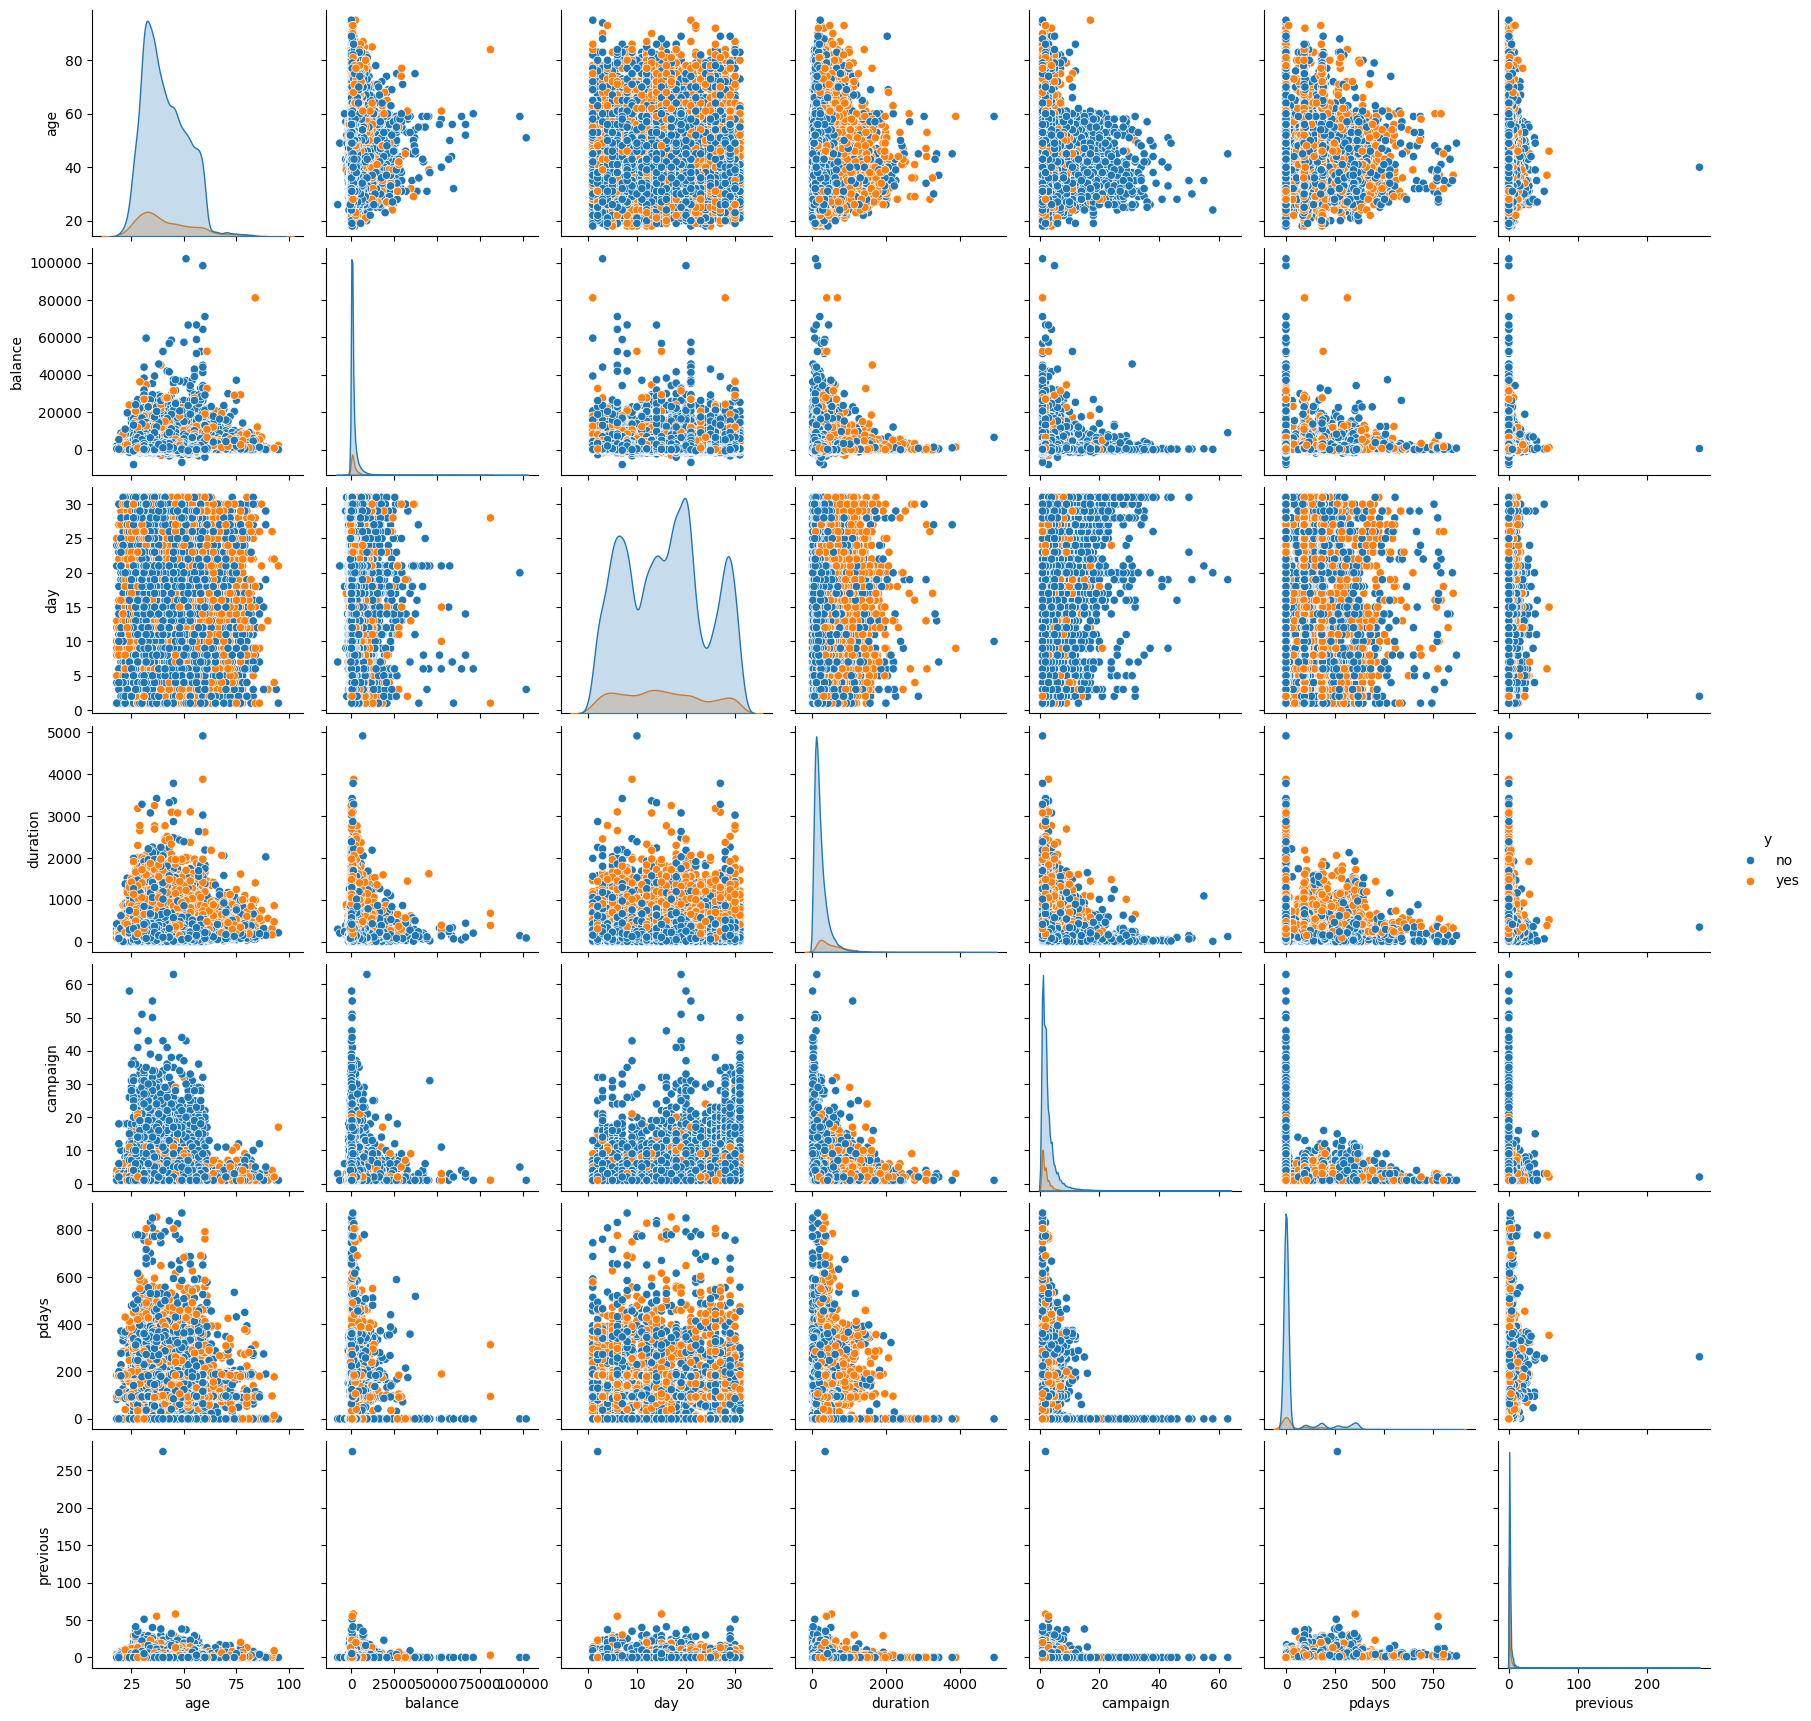

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(raw_df, diag_kind='kde', hue='y')

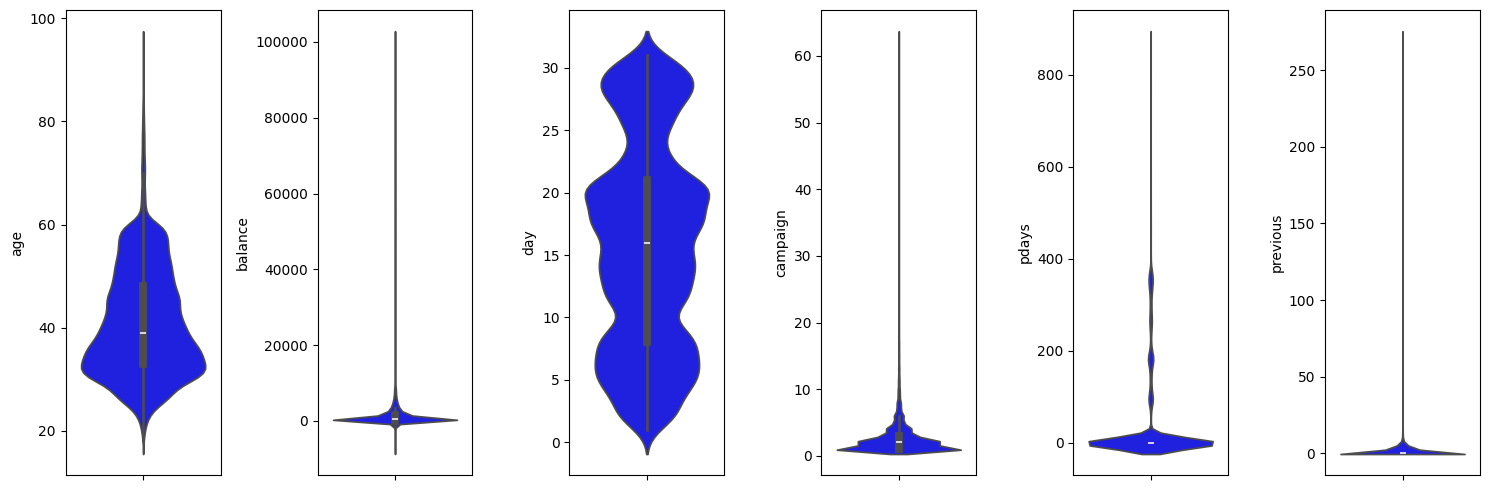

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=raw_df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

<Axes: xlabel='Count', ylabel='job'>

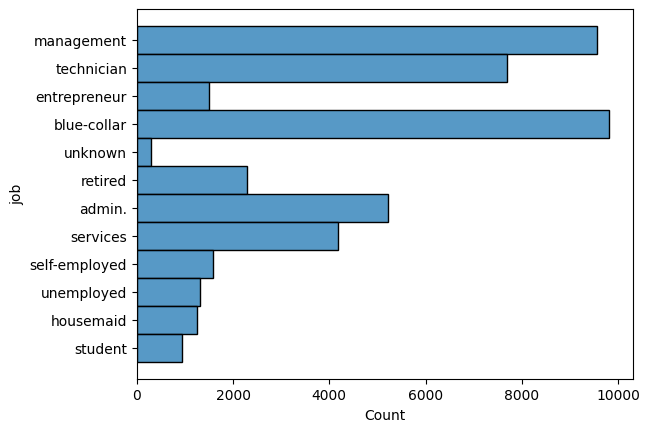

In [ ]:
sns.histplot(data=raw_df, y='job')

<Axes: xlabel='marital', ylabel='count'>

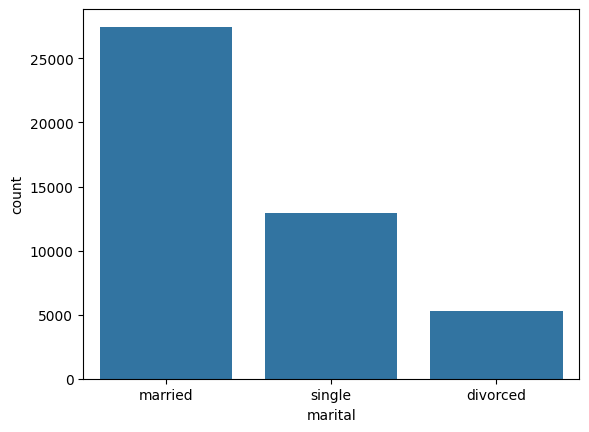

In [ ]:
sns.countplot(data=raw_df, x='marital')

<Axes: xlabel='education', ylabel='count'>

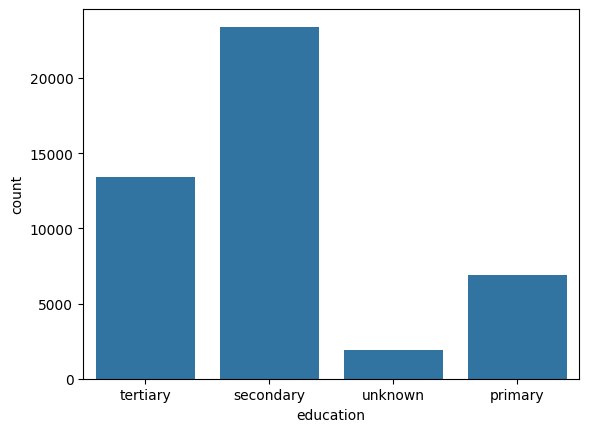

In [ ]:
sns.countplot(data=raw_df, x='education')

<Axes: xlabel='month', ylabel='Count'>

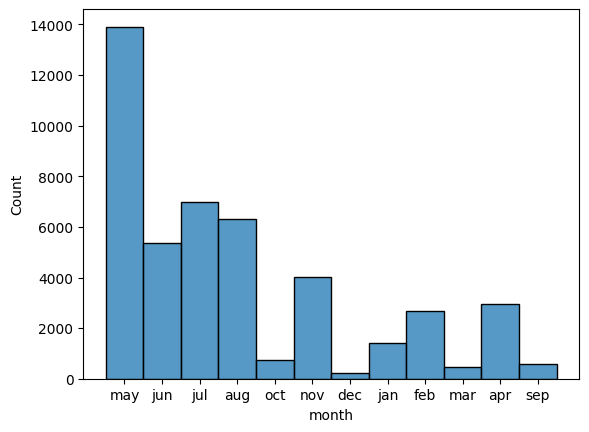

In [ ]:
sns.histplot(data=raw_df, x='month')

<Axes: xlabel='contact', ylabel='count'>

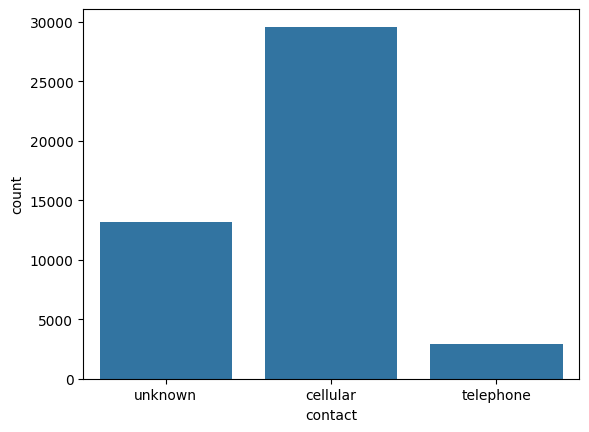

In [ ]:
sns.countplot(data=raw_df, x='contact')

<Axes: xlabel='contact', ylabel='Count'>

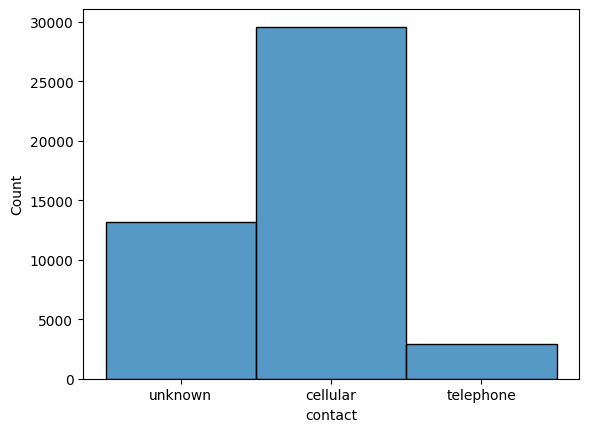

In [ ]:
sns.histplot(data=raw_df, x='contact')

<Axes: xlabel='poutcome', ylabel='Count'>

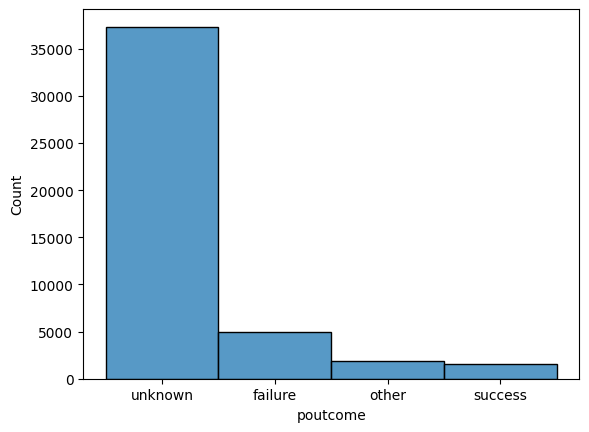

In [ ]:
sns.histplot(data=raw_df, x='poutcome')